## 1. Diabetes data 

### 1) 실습 내용 

#### - 데이터 가져오기 

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np

diabetes=load_diabetes()

#### - X 값 준비

In [2]:
df_X = np.array(diabetes.data)
df_y = np.array(diabetes.target)

In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
diabetes.data[0] # 모두 실수형

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [5]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

#### - train, test data 분리 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, y_train.shape

((353, 10), (353,))

In [8]:
X_test.shape, y_test.shape

((89, 10), (89,))

#### - 모델 구현

In [9]:
# 초기값 생성
W = np.random.rand(10)
b = np.random.rand()

In [10]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [11]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [12]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [13]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [14]:
LEARNING_RATE = 0.1 # 0.0001 -> 0.1
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))    

Iteration 10 : Loss 6257.0854
Iteration 20 : Loss 5914.1187
Iteration 30 : Loss 5837.3821
Iteration 40 : Loss 5765.9708
Iteration 50 : Loss 5696.8003
Iteration 60 : Loss 5629.7613
Iteration 70 : Loss 5564.7811
Iteration 80 : Loss 5501.7900
Iteration 90 : Loss 5440.7208
Iteration 100 : Loss 5381.5087
Iteration 110 : Loss 5324.0909
Iteration 120 : Loss 5268.4071
Iteration 130 : Loss 5214.3989
Iteration 140 : Loss 5162.0101
Iteration 150 : Loss 5111.1862
Iteration 160 : Loss 5061.8748
Iteration 170 : Loss 5014.0254
Iteration 180 : Loss 4967.5890
Iteration 190 : Loss 4922.5185
Iteration 200 : Loss 4878.7684
Iteration 210 : Loss 4836.2948
Iteration 220 : Loss 4795.0552
Iteration 230 : Loss 4755.0087
Iteration 240 : Loss 4716.1157
Iteration 250 : Loss 4678.3383
Iteration 260 : Loss 4641.6394
Iteration 270 : Loss 4605.9836
Iteration 280 : Loss 4571.3365
Iteration 290 : Loss 4537.6650
Iteration 300 : Loss 4504.9372
Iteration 310 : Loss 4473.1222
Iteration 320 : Loss 4442.1901
Iteration 330 : L

Iteration 2630 : Loss 3009.5568
Iteration 2640 : Loss 3008.5873
Iteration 2650 : Loss 3007.6270
Iteration 2660 : Loss 3006.6758
Iteration 2670 : Loss 3005.7336
Iteration 2680 : Loss 3004.8002
Iteration 2690 : Loss 3003.8757
Iteration 2700 : Loss 3002.9598
Iteration 2710 : Loss 3002.0526
Iteration 2720 : Loss 3001.1539
Iteration 2730 : Loss 3000.2636
Iteration 2740 : Loss 2999.3817
Iteration 2750 : Loss 2998.5081
Iteration 2760 : Loss 2997.6426
Iteration 2770 : Loss 2996.7853
Iteration 2780 : Loss 2995.9359
Iteration 2790 : Loss 2995.0945
Iteration 2800 : Loss 2994.2610
Iteration 2810 : Loss 2993.4352
Iteration 2820 : Loss 2992.6172
Iteration 2830 : Loss 2991.8068
Iteration 2840 : Loss 2991.0039
Iteration 2850 : Loss 2990.2084
Iteration 2860 : Loss 2989.4204
Iteration 2870 : Loss 2988.6397
Iteration 2880 : Loss 2987.8662
Iteration 2890 : Loss 2987.0999
Iteration 2900 : Loss 2986.3407
Iteration 2910 : Loss 2985.5886
Iteration 2920 : Loss 2984.8434
Iteration 2930 : Loss 2984.1050
Iteratio

Iteration 5390 : Loss 2910.6019
Iteration 5400 : Loss 2910.5118
Iteration 5410 : Loss 2910.4225
Iteration 5420 : Loss 2910.3339
Iteration 5430 : Loss 2910.2459
Iteration 5440 : Loss 2910.1586
Iteration 5450 : Loss 2910.0720
Iteration 5460 : Loss 2909.9860
Iteration 5470 : Loss 2909.9007
Iteration 5480 : Loss 2909.8161
Iteration 5490 : Loss 2909.7321
Iteration 5500 : Loss 2909.6487
Iteration 5510 : Loss 2909.5660
Iteration 5520 : Loss 2909.4839
Iteration 5530 : Loss 2909.4024
Iteration 5540 : Loss 2909.3216
Iteration 5550 : Loss 2909.2414
Iteration 5560 : Loss 2909.1617
Iteration 5570 : Loss 2909.0827
Iteration 5580 : Loss 2909.0043
Iteration 5590 : Loss 2908.9265
Iteration 5600 : Loss 2908.8492
Iteration 5610 : Loss 2908.7726
Iteration 5620 : Loss 2908.6965
Iteration 5630 : Loss 2908.6210
Iteration 5640 : Loss 2908.5461
Iteration 5650 : Loss 2908.4717
Iteration 5660 : Loss 2908.3979
Iteration 5670 : Loss 2908.3247
Iteration 5680 : Loss 2908.2520
Iteration 5690 : Loss 2908.1798
Iteratio

Iteration 9170 : Loss 2898.6168
Iteration 9180 : Loss 2898.6083
Iteration 9190 : Loss 2898.5998
Iteration 9200 : Loss 2898.5913
Iteration 9210 : Loss 2898.5829
Iteration 9220 : Loss 2898.5745
Iteration 9230 : Loss 2898.5661
Iteration 9240 : Loss 2898.5578
Iteration 9250 : Loss 2898.5495
Iteration 9260 : Loss 2898.5413
Iteration 9270 : Loss 2898.5331
Iteration 9280 : Loss 2898.5249
Iteration 9290 : Loss 2898.5168
Iteration 9300 : Loss 2898.5087
Iteration 9310 : Loss 2898.5006
Iteration 9320 : Loss 2898.4925
Iteration 9330 : Loss 2898.4846
Iteration 9340 : Loss 2898.4766
Iteration 9350 : Loss 2898.4687
Iteration 9360 : Loss 2898.4608
Iteration 9370 : Loss 2898.4529
Iteration 9380 : Loss 2898.4451
Iteration 9390 : Loss 2898.4373
Iteration 9400 : Loss 2898.4295
Iteration 9410 : Loss 2898.4218
Iteration 9420 : Loss 2898.4141
Iteration 9430 : Loss 2898.4064
Iteration 9440 : Loss 2898.3988
Iteration 9450 : Loss 2898.3912
Iteration 9460 : Loss 2898.3837
Iteration 9470 : Loss 2898.3761
Iteratio

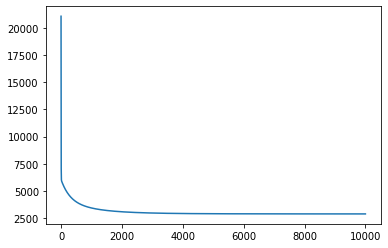

In [15]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

#### - 예측 & MSE 손실함수  

In [16]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2880.2686842844782

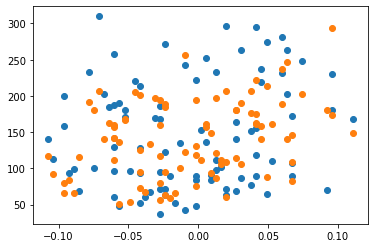

In [17]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)

### 2) sklearn 라이브러리 사용

In [18]:
# 데이터 저장

X = diabetes.data
y = diabetes.target

In [19]:
# X, y split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### - 모델 학습

In [20]:
# LinearRegression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # 훈련

LinearRegression()

In [21]:
# 예측
predictions = model.predict(X_test)
predictions

array([139.5483133 , 179.52030578, 134.04133298, 291.41193598,
       123.78723656,  92.17357677, 258.23409704, 181.33895238,
        90.22217862, 108.63143298,  94.13938654, 168.43379636,
        53.50669663, 206.63040068, 100.13238561, 130.66881649,
       219.53270758, 250.78291772, 196.36682356, 218.57497401,
       207.35002447,  88.48361667,  70.43428801, 188.95725301,
       154.88720039, 159.35957695, 188.31587948, 180.38835506,
        47.98988446, 108.97514644, 174.78080029,  86.36598906,
       132.95890535, 184.5410226 , 173.83298051, 190.35863287,
       124.41740796, 119.65426903, 147.95402494,  59.05311211,
        71.62636914, 107.68722902, 165.45544477, 155.00784964,
       171.04558668,  61.45763075,  71.66975626, 114.96330486,
        51.57808027, 167.57781958, 152.52505798,  62.95827693,
       103.49862017, 109.20495627, 175.63844013, 154.60247734,
        94.41476124, 210.74244148, 120.25601864,  77.61590087,
       187.93503183, 206.49543321, 140.63018684, 105.59

#### - test 데이터 성능 확인

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
mse

2900.1732878832318

#### - 정답 데이터, 예측 데이터 시각화

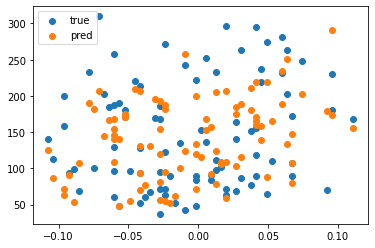

In [23]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")
plt.legend()
plt.show()

## 2. bike-sharing-demand 

In [24]:
import pandas as pd
import os
print(os.getcwd())
train = pd.read_csv('../../../data/data/bike-sharing-demand/train.csv')

/aiffel/aiffel/project/test-AIF


In [25]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [26]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### - 시간 데이터 저장 및 시각화

In [27]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [28]:
train['year'] = train['datetime'].dt.year # 1번 표현
train['month']= pd.DatetimeIndex(train['datetime']).month # 2번 표현
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = train['datetime'].dt.hour # 1번 표현
train['minute'] = train['datetime'].dt.minute # 1번 표현
train['second'] = train['datetime'].dt.second # 1번 표현

In [29]:
# hour 단위 아래로 표현 없는듯
train.minute.max()

0

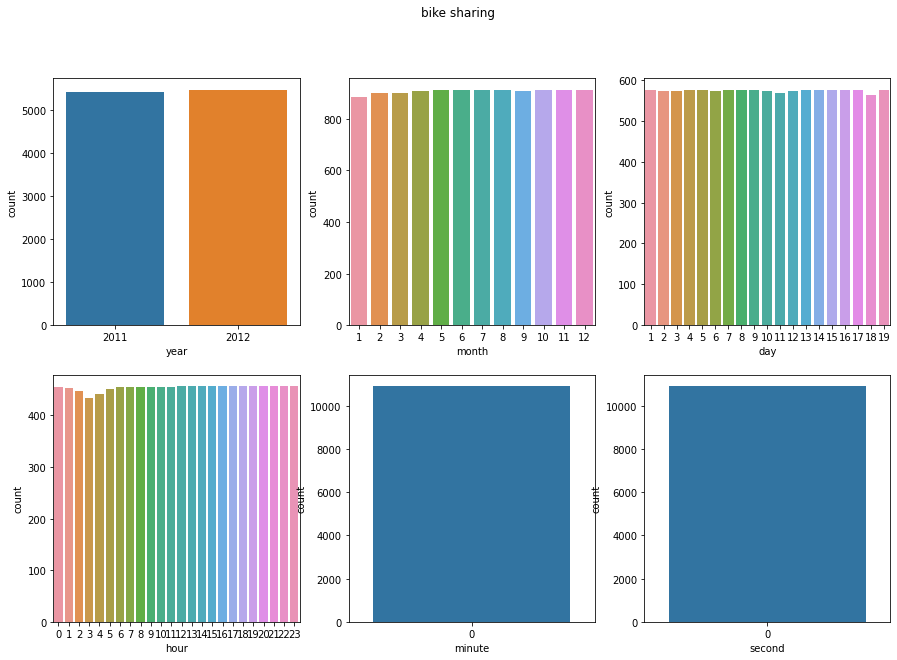

In [30]:
import seaborn as sns
cols = ["year", "month", "day", "hour", "minute", "second"]
fig, axes = plt.subplots(2, 3, figsize=(15,10))
fig.suptitle('bike sharing')
for i in range(2):
    for j in range(3):
        sns.countplot(ax = axes[i][j], x = cols[i*3+j], data = train)

In [31]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [32]:
X = train[['season','holiday','workingday','weather','temp','atemp','humidity',
           'windspeed','casual','registered','year','month','day','hour']]
# 값의 차이가 없는 hour 미만 시간단위 제외
y = train['count']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [34]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8708, 14) (2178, 14)
(8708,) (2178,)


#### - 학습 및 예측

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # 훈련

LinearRegression()

In [36]:
y_test.values

array([127,  13, 163, ..., 509,   5, 239])

In [37]:
# 예측
predictions = model.predict(X_test)
predictions

array([127.,  13., 163., ..., 509.,   5., 239.])

#### - 손실함수값 나타내기

In [38]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("MSE: ", format(mse, "0.25f"), "RMSE: ", format(rmse, "0.15f"))

MSE:  0.0000000000000000000000002 RMSE:  0.000000000000454


#### - 결과 시각화

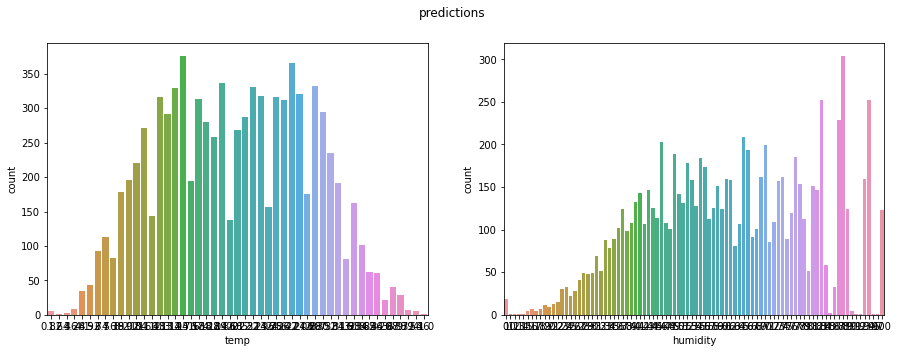

In [39]:
cols = ["temp", "humidity"]
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('predictions')

for i in range(2):
    # plt.setp(axes[i], xticks = [train[cols[i]].min(), train[cols[i]].max()]) # 에잇 안해
    sns.countplot(ax = axes[i], x = cols[i], data = X_train)

### 회고

- 그래프 xticks 설정이 subplots 사용할 때 안먹혀서 다른 방법을 찾아봐야할 것 같다.
- 자전거 데이터에서 MSE값이 굉장히 작은데 검증이 필요할 것 같다.